#Importing Requried Libraries

In [ ]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
import zipfile
path = '/content/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path,mode='r')
zip_object.extractall('./')
zip_object.close()


In [ ]:
import os
print(os.listdir('/content/yalefaces/train'))

['subject05.centerlight.gif', 'subject10.happy.gif', 'subject12.sad.gif', 'subject07.normal.gif', 'subject08.wink.gif', 'subject06.glasses.gif', 'subject15.centerlight.gif', 'subject05.wink.gif', 'subject13.centerlight.gif', 'subject01.sleepy.gif', 'subject13.glasses.gif', 'subject15.normal.gif', 'subject03.centerlight.gif', 'subject14.rightlight.gif', 'subject04.wink.gif', 'subject09.noglasses.gif', 'subject02.rightlight.gif', 'subject01.noglasses.gif', 'subject10.leftlight.gif', 'subject01.surprised.gif', 'subject06.sad.gif', 'subject07.wink.gif', 'subject13.noglasses.gif', 'subject05.normal.gif', 'subject05.rightlight.gif', 'subject02.happy.gif', 'subject03.wink.gif', 'subject12.surprised.gif', 'subject09.glasses.gif', 'subject14.happy.gif', 'subject05.leftlight.gif', 'subject15.wink.gif', 'subject02.normal.gif', 'subject08.noglasses.gif', 'subject13.normal.gif', 'subject12.sleepy.gif', 'subject08.centerlight.gif', 'subject07.rightlight.gif', 'subject14.sleepy.gif', 'subject06.cente

#Preprocessing the dataset

In [ ]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train',f)for f in os.listdir('/content/yalefaces/train')]
  #print(path)
  faces=[]
  ids=[]
  for path in paths:
    #converting to grayscale
    image = Image.open(path).convert('L')
    #print(image)
    image_np = np.array(image,'uint8')
    #print(type(image_np))
    id = int(os.path.split(path)[1].split('.')[0].replace('subject',''))
    #print(id)
    ids.append(id)
    faces.append(image_np)
  return faces,np.array(ids)

In [ ]:
faces,ids = get_image_data()

In [ ]:
ids

array([ 5, 10, 12,  7,  8,  6, 15,  5, 13,  1, 13, 15,  3, 14,  4,  9,  2,
        1, 10,  1,  6,  7, 13,  5,  5,  2,  3, 12,  9, 14,  5, 15,  2,  8,
       13, 12,  8,  7, 14,  6,  6,  4, 11,  8, 15, 15,  1, 12,  5, 11,  6,
       15,  2,  9,  3,  5, 14,  8,  2,  7, 11,  7, 15,  9,  2,  4, 10, 15,
        4,  6,  4, 10,  2, 13,  2, 12,  8,  5,  9,  5, 14, 15,  4, 10,  6,
       11,  3, 10,  1, 13,  9, 10, 12,  6,  1,  3,  3, 14,  3,  8,  7,  4,
       12, 12, 14,  2,  7, 11, 11,  1,  3, 10, 11,  9,  1, 14,  8, 12,  6,
       14, 13,  4, 11,  4, 11, 13,  7,  8,  3,  1,  7, 13,  9,  9, 10])

In [ ]:
faces

[array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [251, 252, 253, ..., 182, 174, 176],
        [229, 231, 232, ..., 227, 220, 214],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 243, 255, 255],
        [255, 255, 255, ..., 238, 241, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[114, 119, 124, ..., 255, 238, 244],
        [251, 255, 255, ..., 255, 246, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [241, 255, 255, ..., 178, 165, 171],
        [245, 255, 255, ..., 183, 164, 165],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

#Training the LBPH classifier

In [ ]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius = 4,neighbors = 14,grid_x=9,grid_y=9)
lbph_classifier.train(faces,ids)
lbph_classifier.write('lbph_classifier.yml')

#Recognizing the faces

In [ ]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [ ]:
test_image='/content/yalefaces/test/subject01.happy.gif'

In [ ]:
image = Image.open(test_image).convert('L')
image_np=np.array(image,'uint8')
image_np


array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 249, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [ ]:
prediction = lbph_face_classifier.predict(image_np)
prediction

(1, 63.26476332390736)

In [ ]:
prediction[0]

1

In [ ]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject',''))

In [ ]:
expected_output

1

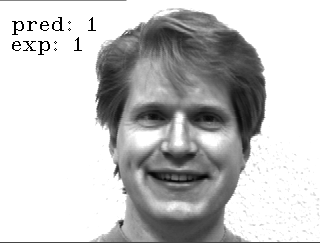

In [ ]:
cv2.putText(image_np,'pred: '+str(prediction[0]),(10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(image_np,'exp: '+str(expected_output),(10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(image_np)

#Evaluvating the classifier

In [ ]:
paths = [os.path.join('/content/yalefaces/test',f) for f in os.listdir('/content/yalefaces/test')]
predictions=[]
expected_outputs=[]
for path in paths:
  image = Image.open(path).convert('L')
  image_np = np.array(image)
  prediction,_ = lbph_face_classifier.predict(image_np)
  expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject',''))
  predictions.append(prediction)
  expected_outputs.append(expected_output)

In [ ]:
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs, predictions)

0.7

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_outputs, predictions)
cm

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

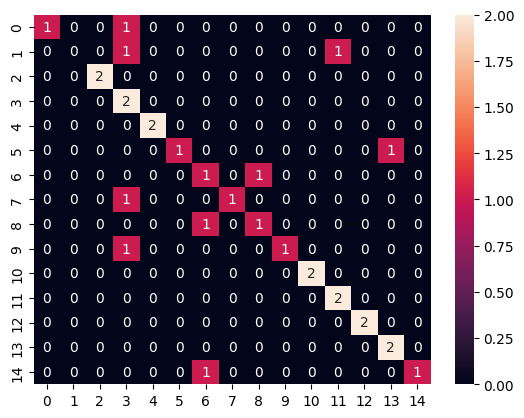

In [ ]:
import seaborn
seaborn.heatmap(cm, annot=True);

#Dlib

In [ ]:
import dlib

#Detecting facial points

In [ ]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

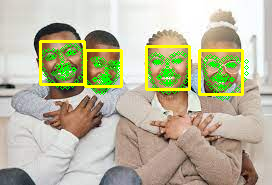

In [ ]:
image = cv2.imread('/content/smile picture4.jpg')
face_detection = face_detector(image,1)
for face in face_detection:
  points = points_detector(image,face)
  for point in points.parts():
    cv2.circle(image,(point.x,point.y),2,(0,255,0),1)
  l,t,r,b = face.left(),face.top(),face.right(),face.bottom()
  cv2.rectangle(image,(l,t),(r,b),(0,255,255),2)
cv2_imshow(image)

#Detecting facial descriptors

In [ ]:
face_discriptor_extractor = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')

In [ ]:
index= {}
idx = 0
face_discriptors = None
p =0
paths = [os.path.join('/content/yalefaces/train',f) for f in os.listdir('/content/yalefaces/train')]
for path in paths:
  print(p)
  p=p+1
  image = Image.open(path).convert('RGB')
  image_np = np.array(image,'uint8')
  face_detection = face_detector(image_np,1)
  print(face_detection)
  for face in face_detection:
    points = points_detector(image_np,face)
    for point in points.parts():
      cv2.circle(image_np,(point.x,point.y),2,(0,255,0),1)
    l,t,r,b = face.left(),face.top(),face.right(),face.bottom()
    cv2.rectangle(image_np,(l,t),(r,b),(0,255,255),2)
  #cv2_imshow(image_np)
    face_discriptor = face_discriptor_extractor.compute_face_descriptor(image_np,points)
    #print(len(face_discriptor))
    face_discriptor = [f for f in face_discriptor]
    #print((face_discriptor))
    face_discriptor = np.asarray(face_discriptor,dtype=np.float64)
    face_discriptor = face_discriptor[np.newaxis,:]
    if face_discriptors is None:
      face_discriptors = face_discriptor
      #print("if",face_discriptors)
    else:
      face_discriptors = np.concatenate((face_discriptors,face_discriptor),axis=0)
      #print("else",face_discriptors)
    index[idx]= path
    #print(index[idx])
    #print(idx)
    idx+=1


0
rectangles[[(127, 104) (235, 211)]]
1
rectangles[[(110, 82) (239, 211)]]
2
rectangles[[(124, 96) (253, 225)]]
3
rectangles[[(110, 96) (239, 225)]]
4
rectangles[[(81, 96) (210, 225)]]
5
rectangles[[(110, 82) (239, 211)]]
6
rectangles[[(53, 82) (182, 211)]]
7
rectangles[[(124, 82) (253, 211)]]
8
rectangles[[(98, 64) (253, 219)]]
9
rectangles[[(96, 96) (225, 225)]]
10
rectangles[[(96, 82) (225, 211)]]
11
rectangles[[(110, 96) (239, 225)]]
12
rectangles[[(96, 82) (225, 211)]]
13
rectangles[[(96, 96) (225, 225)]]
14
rectangles[[(110, 96) (239, 225)]]
15
rectangles[[(110, 96) (239, 225)]]
16
rectangles[[(127, 116) (235, 223)]]
17
rectangles[[(124, 82) (253, 211)]]
18
rectangles[[(96, 82) (225, 211)]]
19
rectangles[[(124, 96) (253, 225)]]
20
rectangles[]
21
rectangles[[(38, 82) (167, 211)]]
22
rectangles[[(96, 96) (225, 225)]]
23
rectangles[[(124, 82) (253, 211)]]
24
rectangles[]
25
rectangles[[(110, 82) (239, 211)]]
26
rectangles[[(115, 64) (270, 219)]]
27
rectangles[[(67, 82) (196, 211)]]

In [ ]:
paths[20]

'/content/yalefaces/train/subject01.rightlight.gif'

In [ ]:
index

{0: '/content/yalefaces/train/subject13.happy.gif',
 1: '/content/yalefaces/train/subject01.sleepy.gif',
 2: '/content/yalefaces/train/subject02.wink.gif',
 3: '/content/yalefaces/train/subject11.sad.gif',
 4: '/content/yalefaces/train/subject09.sleepy.gif',
 5: '/content/yalefaces/train/subject04.rightlight.gif',
 6: '/content/yalefaces/train/subject06.normal.gif',
 7: '/content/yalefaces/train/subject01.leftlight.gif',
 8: '/content/yalefaces/train/subject12.wink.gif',
 9: '/content/yalefaces/train/subject15.leftlight.gif',
 10: '/content/yalefaces/train/subject09.normal.gif',
 11: '/content/yalefaces/train/subject07.sad.gif',
 12: '/content/yalefaces/train/subject10.wink.gif',
 13: '/content/yalefaces/train/subject11.wink.gif',
 14: '/content/yalefaces/train/subject15.wink.gif',
 15: '/content/yalefaces/train/subject13.leftlight.gif',
 16: '/content/yalefaces/train/subject13.noglasses.gif',
 17: '/content/yalefaces/train/subject05.sad.gif',
 18: '/content/yalefaces/train/subject09.h

In [ ]:
len(paths)

135

In [ ]:
print(len(face_discriptors[131]))
print(len(face_discriptors))

128
132


#Calculating the distance between faces

In [ ]:
x = np.linalg.norm(face_descriptors[131]-face_descriptors,axis=1)
print(x)

[0.59083098 0.78327018 0.7366491  0.74414336 0.6322861  0.76815153
 0.71595421 0.68340473 0.79224464 0.54342795 0.59228527 0.7256892
 0.76008525 0.81144236 0.67171973 0.69918537 0.61486882 0.68028568
 0.56913573 0.70272195 0.72212641 0.52674731 0.6391831  0.70566949
 0.66157039 0.68359063 0.77623376 0.73325796 0.73617066 0.65160126
 0.69867322 0.77623376 0.60729356 0.58283512 0.54637049 0.58948861
 0.58049924 0.7812509  0.71898226 0.4107122  0.63029732 0.82208354
 0.52896058 0.91301584 0.69071145 0.57162885 0.56589765 0.78973897
 0.76489837 0.44861953 0.8315868  0.49100625 0.61973556 0.65568899
 0.44168232 0.81623937 0.74698758 0.73049698 0.70272195 0.74155073
 0.75294465 0.74498792 0.38892182 0.68992792 0.7755465  0.45106796
 0.68444466 0.72970759 0.66861681 0.72902301 0.71949837 0.75378378
 0.72298334 0.60186839 0.8078436  0.63166857 0.68596593 0.7614905
 0.79344035 0.7722122  0.74546616 0.65942869 0.75694352 0.66338023
 0.48474815 0.73413234 0.63394414 0.71767529 0.59228527 0.830771

In [ ]:

len(np.linalg.norm(face_descriptors[131]-face_descriptors[:131],axis=1))

131

In [ ]:
np.argmin(np.linalg.norm(face_descriptors[131]-face_descriptors[:131],axis=1))

62

In [ ]:
len(face_descriptors[131])

128

In [ ]:
len(face_descriptors)

132

In [ ]:
9*15

135

In [ ]:
distance = face_descriptors[62]
distance

array([-0.13871181,  0.17911871,  0.06734454, -0.04706377, -0.16056351,
        0.01286667, -0.0903481 , -0.07105234,  0.13247487, -0.07128911,
        0.21815267, -0.00669304, -0.16685912,  0.00693111, -0.00657155,
        0.13448223, -0.13200247, -0.10072009, -0.12406659, -0.12559071,
       -0.00877146, -0.01869271, -0.01462257,  0.07353873, -0.16662924,
       -0.25730693, -0.08702931, -0.10804627,  0.078734  , -0.0615443 ,
       -0.10466887, -0.065643  , -0.23051517, -0.12107439,  0.03142992,
        0.03700355, -0.02820846,  0.03131583,  0.11766727, -0.03024349,
       -0.12333112,  0.09863625,  0.09288016,  0.27770463,  0.1968502 ,
        0.12383997,  0.04416736, -0.05561921,  0.06370497, -0.19681427,
        0.09570727,  0.0967346 ,  0.16688895,  0.04168688,  0.0774866 ,
       -0.15349419, -0.01935828,  0.12966566, -0.13593429,  0.11658706,
        0.11374476,  0.00633635, -0.11923072, -0.08849548,  0.29279956,
        0.1711351 , -0.13199607, -0.16644844,  0.1413087 , -0.13

In [ ]:
print(index)

{0: '/content/yalefaces/train/subject13.happy.gif', 1: '/content/yalefaces/train/subject01.sleepy.gif', 2: '/content/yalefaces/train/subject02.wink.gif', 3: '/content/yalefaces/train/subject11.sad.gif', 4: '/content/yalefaces/train/subject09.sleepy.gif', 5: '/content/yalefaces/train/subject04.rightlight.gif', 6: '/content/yalefaces/train/subject06.normal.gif', 7: '/content/yalefaces/train/subject01.leftlight.gif', 8: '/content/yalefaces/train/subject12.wink.gif', 9: '/content/yalefaces/train/subject15.leftlight.gif', 10: '/content/yalefaces/train/subject09.normal.gif', 11: '/content/yalefaces/train/subject07.sad.gif', 12: '/content/yalefaces/train/subject10.wink.gif', 13: '/content/yalefaces/train/subject11.wink.gif', 14: '/content/yalefaces/train/subject15.wink.gif', 15: '/content/yalefaces/train/subject13.leftlight.gif', 16: '/content/yalefaces/train/subject13.noglasses.gif', 17: '/content/yalefaces/train/subject05.sad.gif', 18: '/content/yalefaces/train/subject09.happy.gif', 19: '/c

#Detecting faces with Dlib

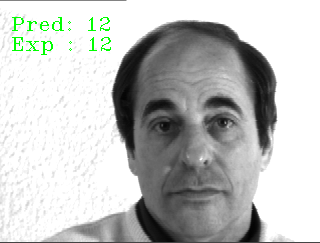

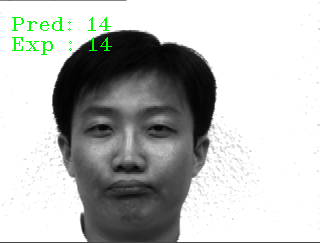

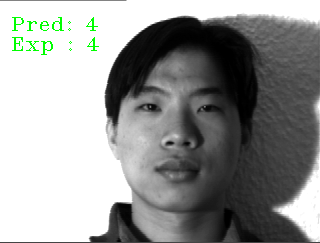

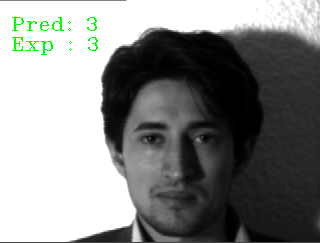

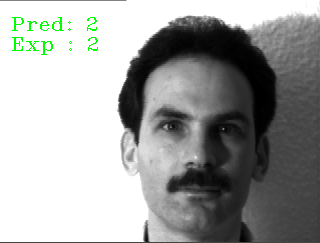

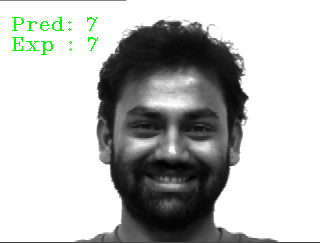

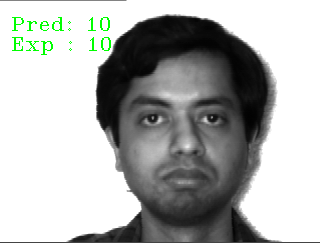

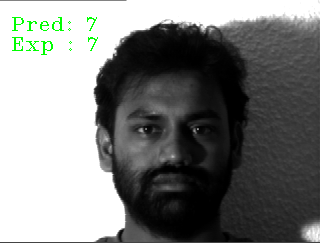

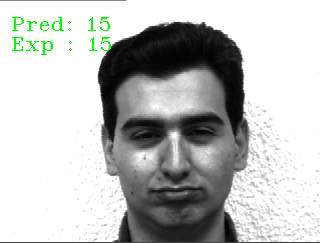

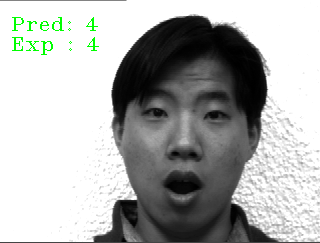

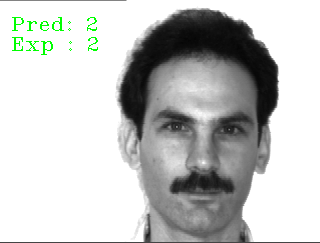

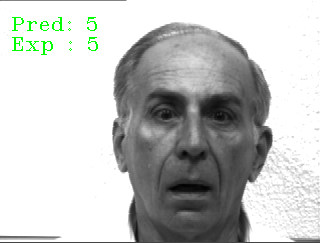

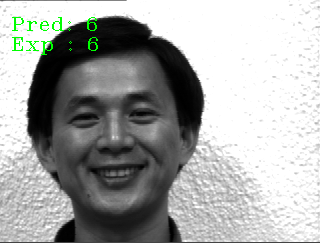

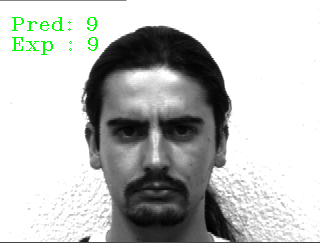

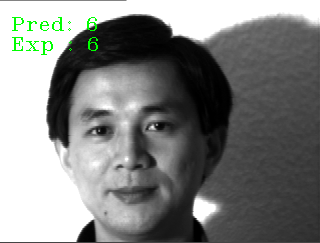

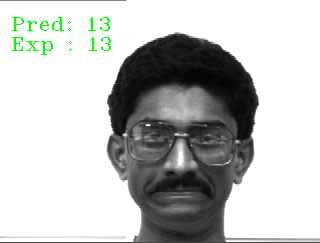

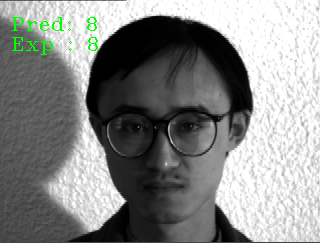

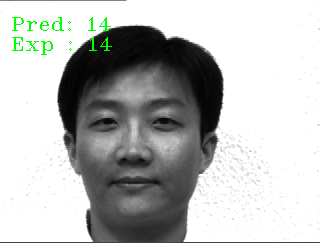

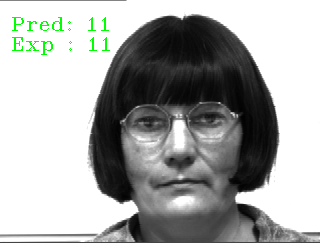

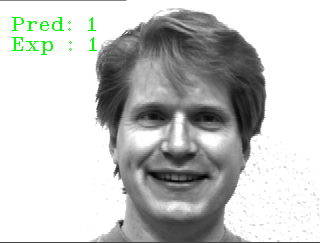

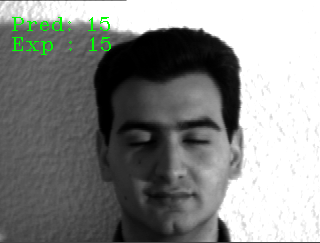

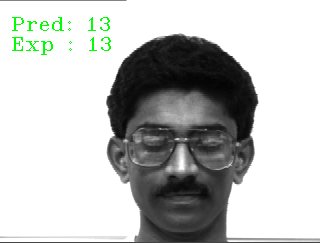

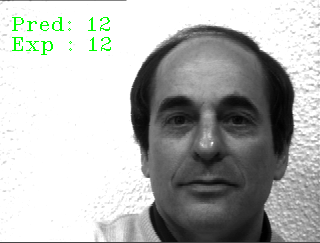

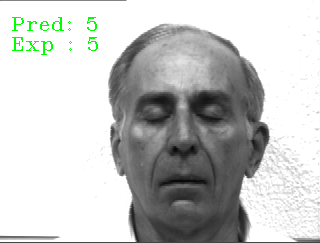

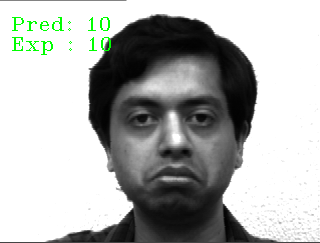

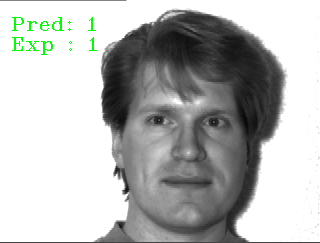

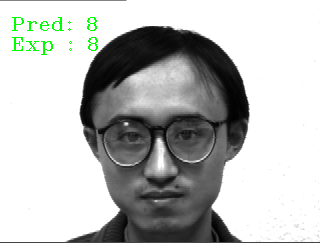

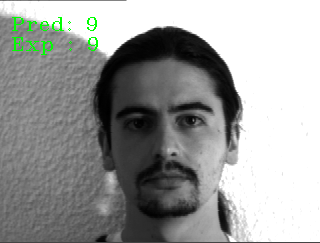

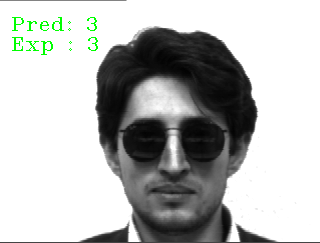

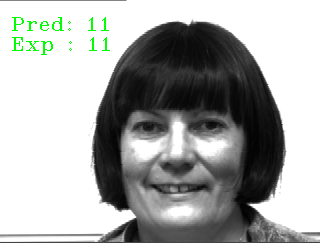

In [ ]:
threshold =0.5
predictions =[]
expected_outputs =[]
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
for path in paths:
  image = Image.open(path).convert('RGB')
  image_np = np.array(image, 'uint8')
  face_detection = face_detector(image_np, 1)
  for face in face_detection:
    points = points_detector(image_np, face)
    face_descriptor = face_discriptor_extractor.compute_face_descriptor(image_np, points)
    face_descriptor = [f for f in face_descriptor]
    face_descriptor = np.asarray(face_descriptor, dtype=np.float64)
    face_descriptor = face_descriptor[np.newaxis, :]
    #print(len(face_descriptor))
    #print(len(face_descriptors))
    distances = np.linalg.norm(face_descriptor-face_discriptors,axis=1)
    #print(distances)
    min_index = np.argmin(distances)
    #print("min_index",min_index)
    #print(index[min_index])
    min_distance = distances[min_index]
    if min_distance <= threshold:
      name_pred = int(os.path.split(index[min_index])[1].split('.')[0].replace('subject', ''))
    else:
      name_pred = 'Not identified'
    #print(name_pred)
    name_real = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    #print(name_real)
    predictions.append(name_pred)
    expected_outputs.append(name_real)

    cv2.putText(image_np, 'Pred: ' + str(name_pred), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
    cv2.putText(image_np, 'Exp : ' + str(name_real), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
    cv2_imshow(image_np)

predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)


In [ ]:
predictions

array([12, 14,  4,  3,  2,  7, 10,  7, 15,  4,  2,  5,  6,  9,  6, 13,  8,
       14, 11,  1, 15, 13, 12,  5, 10,  1,  8,  9,  3, 11])

In [ ]:
expected_outputs

array([12, 14,  4,  3,  2,  7, 10,  7, 15,  4,  2,  5,  6,  9,  6, 13,  8,
       14, 11,  1, 15, 13, 12,  5, 10,  1,  8,  9,  3, 11])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs, predictions)

1.0

#LiveWeb Cam
***Note*** below code should be run in IDE not in google colab

In [ ]:
import zipfile
path = '/content/Madhavan_Haripriya1.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

#Preprocessing the dataset

In [ ]:
def get_image_data():
  paths = [os.path.join('/content/Madhavan_Haripriya1/Madhavan_Hari', f) for f in os.listdir('/content/Madhavan_Haripriya1/Madhavan_Hari')]
  faces = []
  ids = []
  for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')
    print(path)
    id = int(os.path.split(path)[1].split('.')[0].split(' ')[0])

    ids.append(id)
    faces.append(image_np)

  return np.array(ids), faces

In [ ]:
print(path)

/content/Madhavan_Haripriya1/Madhavan_Hari/2 (13).jpg


In [ ]:
ids, faces = get_image_data()

/content/Madhavan_Haripriya1/Madhavan_Hari/1 (22).jpg
/content/Madhavan_Haripriya1/Madhavan_Hari/1 (3).jpg
/content/Madhavan_Haripriya1/Madhavan_Hari/1 (11).jpg
/content/Madhavan_Haripriya1/Madhavan_Hari/1 (17).jpg
/content/Madhavan_Haripriya1/Madhavan_Hari/2 (14).jpg
/content/Madhavan_Haripriya1/Madhavan_Hari/1 (28).jpg
/content/Madhavan_Haripriya1/Madhavan_Hari/2 (11).jpg
/content/Madhavan_Haripriya1/Madhavan_Hari/2 (35).jpg
/content/Madhavan_Haripriya1/Madhavan_Hari/1 (2).jpg
/content/Madhavan_Haripriya1/Madhavan_Hari/2 (21).jpg
/content/Madhavan_Haripriya1/Madhavan_Hari/1 (26).jpg
/content/Madhavan_Haripriya1/Madhavan_Hari/2 (26).jpg
/content/Madhavan_Haripriya1/Madhavan_Hari/2 (9).jpg
/content/Madhavan_Haripriya1/Madhavan_Hari/1 (30).jpg
/content/Madhavan_Haripriya1/Madhavan_Hari/2 (31).jpg
/content/Madhavan_Haripriya1/Madhavan_Hari/2 (29).jpg
/content/Madhavan_Haripriya1/Madhavan_Hari/2 (8).jpg
/content/Madhavan_Haripriya1/Madhavan_Hari/2 (36).jpg
/content/Madhavan_Haripriya1/Mad

In [ ]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier_Madhavan_Hari.yml')

#Recognizing the faces through LiveWeb camera


In [ ]:
import cv2
face_detector = cv2.CascadeClassifier('Computer Vision Masterclass-20231012T094504Z-001/Computer Vision Masterclass/Cascades/haarcascade_frontalface_default.xml')
face_recogn = cv2.face.LBPHFaceRecognizer_create()
face_recogn.read('lbph_classifier_Madhavan_Hari.yml')
weight,height=288,288
video_capture = cv2.VideoCapture(0)  # Use 0 for the default camera, or provide the path to a video file
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
while True:
    # Capture frame-by-frame
    connected, image = video_capture.read()

    # Convert the frame to grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform face detection
    face_detections = face_detector.detectMultiScale(image_gray,scaleFactor=1.1)
    print(face_detections)
    for (x, y, w, h) in face_detections:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        image_face = cv2.resize(image_gray[y:y+w,x:x+h],(weight,height))
        id,confidence = face_recogn.predict(image_face)
        name =""
        if id == 1:
            name ='Madhavan'
        elif id ==2:
            name = 'Hari'
        cv2.putText(image, 'Pred: ' + name, (x,y+(w+ 30)), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
        cv2.putText(image, 'Exp : ' + str(confidence), (x,y+(h+ 50)), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,0,255))

    # Display the resulting frame
    cv2.imshow('Video', image)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()